In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, Lasso

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Task 1 (3 points + 2 bonus points for a well organized and easy to read plot + 1 bonus point for the short comment)

Consider the following toy dataset with pairs of correlated features:

In [ ]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
  X = np.random.uniform(-1., 1., size=(N, 4))

  y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
  X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
  y += np.random.normal(size=y.shape)

  return X, y

Fit this dataset with Ridge and Lasso (**without the bias term!**), for different correlation levels and various regularization powers.

Separately for Ridge and Lasso, and separately for different correlation levels, plot the fitted parameter values as a function of regularization power (x-axis in log scale). Make sure to make some color and pattern coding to make it clear which parameters correspond to correlating groups of features, e.g.:
```python
# Same color (red), different patterns (solid vs dashed) for features 0 and 2
plt.plot(alpha_values, param_0, color='red', label='0')
plt.plot(alpha_values, param_2, '--', color='red', label='2')

# Same color (blue), different patterns (solid vs dashed) for features 1 and 3
plt.plot(alpha_values, param_1, color='blue', label='1')
plt.plot(alpha_values, param_3, '--', color='blue', label='3')
```
Please also add legends, axis labels and/or titles to be able to understand what's shown on this or that plot.

What do you observe? How regularization affects the two kinds of models for different correlation levels? Write a short comment.

100%|██████████| 100/100 [00:39<00:00,  2.52it/s]


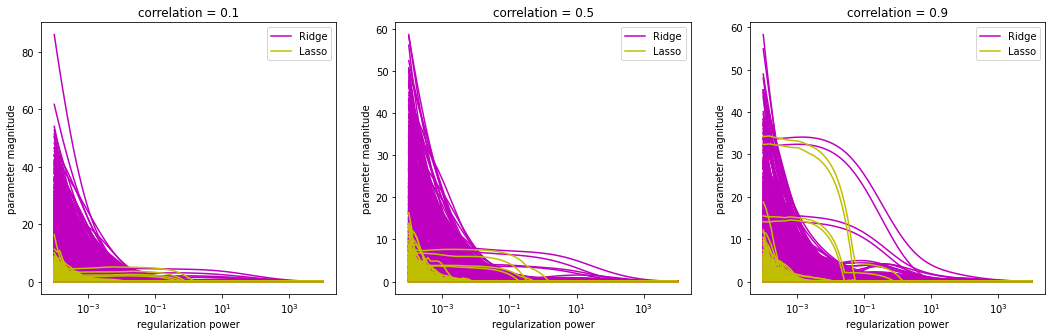

In [90]:
from tqdm import tqdm
counter = 0
plt.figure(figsize=(18, 5))
for correlation in [0.1, 0.5, 0.9]:
  counter += 1
  # dataset to fit (no need to split into train/test in this task):
  X, y = gen_data(500, correlation)

  # regularization powers:
  alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
  params_ridge = []
  params_lasso = []

  for alpha in tqdm(alpha_values):
    
    # apply 1st model with Rodge reg
    linear_model = Ridge(alpha=alpha)
    
    model = make_pipeline(
        PolynomialFeatures(9, include_bias=False),
        linear_model
        )
    model.fit(X, y)
    
    params_ridge.append(
        np.append(linear_model.coef_,
                  linear_model.intercept_)
        )
    # apply 1st model with Rodge reg    
    linear_model = Lasso(alpha=alpha, max_iter=1000000)
    
    model = make_pipeline(
        PolynomialFeatures(9, include_bias=False),
        linear_model
        )
    model.fit(X, y)
    
    params_lasso.append(
        np.append(linear_model.coef_,
                  linear_model.intercept_)
        )
  params_ridge = np.array(params_ridge)
  params_lasso = np.array(params_lasso)
  
  figure_subplot = plt.subplot(1, 3, counter)
  figure_subplot.title.set_text("correlation = {}" .format(correlation))
  plt.plot(alpha_values, np.abs(params_ridge), 'm')
  plt.plot(alpha_values, np.abs(params_lasso), 'y')

  plt.plot(alpha_values,np.zeros(alpha_values.shape), label='Ridge', color = 'm')
  plt.plot(alpha_values,np.zeros(alpha_values.shape), label='Lasso', color = 'y')
  plt.legend(loc=1)
  
  plt.xscale('log')
  plt.xlabel('regularization power')
  plt.ylabel('parameter magnitude')

With a small correlation level, both methods allow for relatively small alphas to achieve a small parameter magnitude. And when using Lasso regularization, this is achieved faster.

However, with an increase in the correlation level, when using both methods, large outliers of the parameter magnitude are observed and one has to use large alpha values for the regularization.